<a href="https://colab.research.google.com/github/maciejweber/machine-learning-bootcamp/blob/master/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)

In [2]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')

data shape: (1000, 1)


In [3]:
print(f'target shape: {target.shape}')

target shape: (1000,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


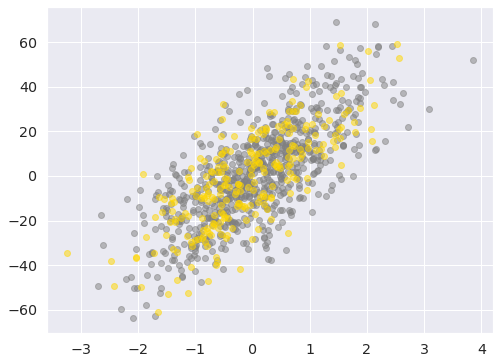

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='gray', alpha=0.5)
plt.scatter(X_test, y_test, color='gold', alpha=0.5)

In [0]:

regression = LinearRegression()

In [13]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
regression.score(X_train, y_train)

0.5358651607106343

In [15]:
regression.score(X_test, y_test)

0.5659717578254748

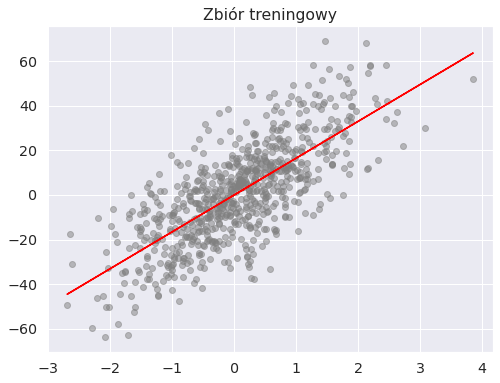

In [19]:
plt.figure(figsize=(8,6))
plt.title('Zbiór treningowy')
plt.scatter(X_train, y_train, color='gray', alpha=0.5)
plt.plot(X_train, regression.intercept_ + regression.coef_[0] * X_train, color='red')
plt.show()

In [18]:
print(regression.intercept_)
print(regression.coef_)

-0.021841542302096006
[16.51]


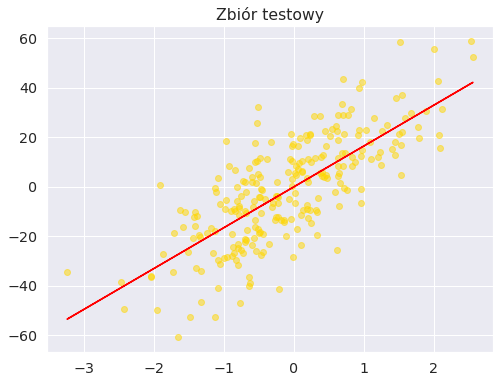

In [21]:
plt.figure(figsize=(8,6))
plt.title('Zbiór testowy')
plt.scatter(X_test, y_test, color='gold', alpha=0.5)
plt.plot(X_test, regression.intercept_ + regression.coef_[0] * X_test, color='red')
plt.show()

In [23]:
y_pred = regression.predict(X_test)

predictions = pd.DataFrame(data={'y_true':y_test,'y_pred':y_pred})
predictions.head()

,y_true,y_pred
0,-1.015112,-7.862339
1,-0.746220,15.814004
2,43.431648,11.661877
3,-1.931385,9.803136
4,-11.866084,-22.764698


In [24]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-1.015112,-7.862339,6.847227
1,-0.746220,15.814004,-16.560224
2,43.431648,11.661877,31.769771
3,-1.931385,9.803136,-11.734521
4,-11.866084,-22.764698,10.898614


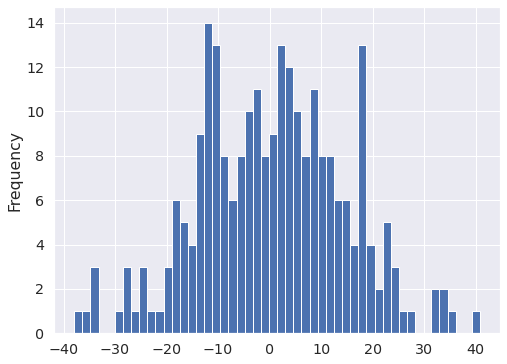

In [25]:
predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))